In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch

In [12]:
import pandas as pd

# 使用适当的分隔符，这里以空格为例
name = ['1.0']
df = pd.read_csv(f"data_wavevel_{name[0]}.txt",sep=' ',header=None,skiprows=1)

# 转换为numpy数组
data_array = df.to_numpy()


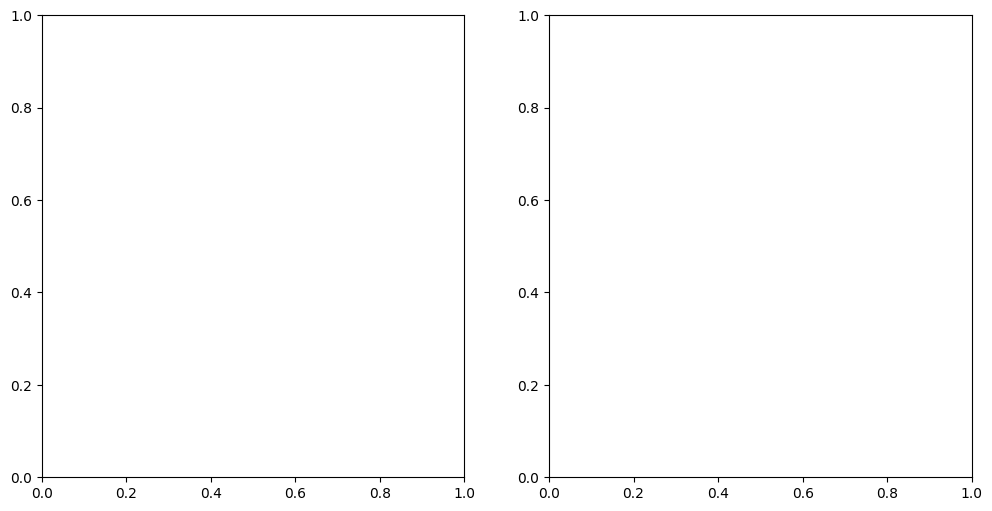

In [53]:

class read_data_totorch():
   def __init__(self,name):
      self.df = pd.read_csv(f"data_wavevel_{name}.txt",sep=' ',header=None,skiprows=1)
      # 转换为numpy数组
      self.wavevel_name = name
      field_data = data_array[:,0:-1]
      self.field_data = np.array(field_data, dtype=float)
      nrows = field_data.shape[0]
      time_steps = nrows// (4*126) 
      self.frames =field_data.reshape(time_steps,4,126,254)
      self.frames =np.array(self.frames, dtype=float)
      self.fig, self.ax = plt.subplots(1, 2, figsize=(12, 6))
   def init_ani(self):
         # 初始化图像和色标
         self.images = [self.ax[i].imshow(self.frames[0, i+2, :, :], vmin=-1, vmax=1, cmap='bwr') for i in range(2)]
         self.cbar = [self.fig.colorbar(self.images[i], ax=self.ax[i], fraction=0.03, pad=0.02) for i in range(2)]
         titles = ['Vorticity', 'Pressure']
   def update_ani(self,t):
      for img, data in zip(self.images, [2, 3]):
        img.set_data(self.frames[t, data, :, :])
        img.axes.set_title(f"wave_vel{self.wavevel_name}step_{t}", fontsize=20)
        plt.tight_layout()
      
   def save_ani(self,frames_number=100):
      # 设置动画
      ani = FuncAnimation(self.fig, self.update_ani, frames=frames_number, init_func=self.init_ani, repeat=False)
      ani.save(f'fish_wa_vel_{self.wavevel_name}_video.mp4', writer='ffmpeg', fps=100)
   def save_torch(self):
      
      tensor_field_data = torch.from_numpy(self.frames)
      torch.save(tensor_field_data, f'wa_vel_{self.wavevel_name}_field_data.pt')

data_read = read_data_totorch('1.0')     


In [54]:
data_read.save_torch()

In [55]:
data_get = torch.load(f'wa_vel_{name[0]}_field_data.pt')

In [106]:
import glob

# 假设你要搜索的目录是 'some_directory/'
txt_files = glob.glob('*.txt')
txt_files

['data_wavevel_0.90455407.txt',
 'data_wavevel_1.0029002.txt',
 'data_wavevel_0.8621515.txt',
 'data_wavevel_1.1469098.txt',
 'data_wavevel_0.9382607.txt',
 'data_wavevel_1.0242608.txt',
 'data_wavevel_0.8729017.txt',
 'data_wavevel_1.0844383.txt',
 'data_wavevel_0.95000273.txt',
 'data_wavevel_1.1430438.txt',
 'data_wavevel_1.0266457.txt',
 'data_wavevel_0.8547928.txt',
 'data_wavevel_0.8544415.txt',
 'data_wavevel_0.9008049.txt',
 'data_wavevel_1.0.txt',
 'data_wavevel_0.8928318.txt',
 'data_wavevel_0.9498181.txt',
 'data_wavevel_0.988978.txt',
 'data_wavevel_1.0737875.txt',
 'data_wavevel_0.9791453.txt',
 'data_wavevel_1.0592097.txt']

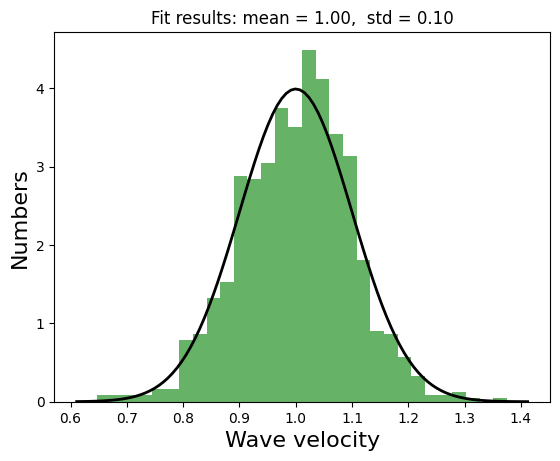

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# 设置高斯分布的参数
mean = 1
variance = 0.01
std_dev = np.sqrt(variance)

# 生成一个包含1000个满足高斯分布的随机数的数组
random_numbers = np.random.normal(mean, std_dev, size=1000)

# 绘制随机数的直方图
plt.hist(random_numbers, bins=30, density=True, alpha=0.6, color='g')

# 绘制高斯分布的理论曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x - mean) ** 2 / (2 * variance)) / (np.sqrt(2 * np.pi * variance))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Wave velocity',fontsize=16)
plt.ylabel('Numbers',fontsize=16)

title = "Fit results: mean = %.2f,  std = %.2f" % (mean, std_dev)
plt.title(title)
plt.show()


In [64]:
import numpy as np


x
(10, 1, 64, 256, 256)
params
(10, 3)
